<a href="https://colab.research.google.com/github/NEBTICS/Cats_Dogs_CNN_model/blob/master/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downgrading tensorflow version from 2.3.0 to 2.2.0 
*  If your pc has 2.3.0 version then skip  !!!
##* Note:-Its important so that the save model is compatible while deploying/testing on different machine! Colab uses a higher Version tensorflow which is not available till now for download 
                                        6-September-2020 

In [7]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [8]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2MB 35kB/s 
     |████████████████████████████████| 3.0MB 64kB/s 
     |████████████████████████████████| 460kB 54.2MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [2]:
import tensorflow as tf
tf.__version__

'2.2.0'

## Instaling kiggle and downloading data set directly from kiggle via colab
 #skip to importing libraries if you already have a dataset or working with jupyter/spyder ide


In [3]:
! pip install -q kaggle

After runing the first cell(! pip install -q kaggle) !
Download the kaggle.json file from the kaggle website
* Steps
1. Create a account at kaggle
2. go to --- My Account-----Scroll down-- you will     find  a option ----create a new api--click
3. jsone file will be downloaded file 

In [4]:
from google.colab import files
files.upload()#upload from pc to colab and copy the path
#upload your json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smithbarbose","key":"efd499fa06f6c2554fefc5408c46cac1"}'}

* making directoy and copying the json file to it

In [5]:
!mkdir ~/.kaggle #make directory
!cp kaggle.json ~/.kaggle #copy to the directory

In [6]:
 ! chmod 600 ~/.kaggle/kaggle.json #changing the permission

Downloading the data set

In [7]:
!kaggle datasets download -d tongpython/cat-and-dog

 92% 201M/218M [00:07<00:00, 24.7MB/s]
100% 218M/218M [00:07<00:00, 29.5MB/s]


Unziping the data set

In [ ]:
!unzip  cat-and-dog.zip

## **Cats and Dog Classification** 


 #importing libraries

In [9]:
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.2.0'

Arranging the images #reshaping the flow

In [10]:
#Importing the data set 
#First we need to create the Image Augmantation
traning_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip='True')
test_datagen=ImageDataGenerator(rescale=1./255)

 * Importing the data set 
 * and spliting into training and test 

In [11]:
#creating the test & train sets
traning_set=traning_datagen.flow_from_directory('/content/training_set/training_set',batch_size=60,target_size=(64,64),class_mode='binary')
test_set=test_datagen.flow_from_directory('/content/test_set/test_set',batch_size=60,target_size=(64,64),class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


* Building the convolution model 

In [12]:
model=tf.keras.Sequential()
#first layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=[64,64,3],activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#second
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#flatten
model.add(tf.keras.layers.Flatten())
#adding the nural net
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0

# Compiling the model with an optimizer 
* the model will train for 10 times ie the epochs
* Feel free to make changes and try but remember it will take more time and the model might over fit

In [13]:
#Compiling
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x=traning_set,validation_data=test_set,epochs=10)


Epoch 1/10
134/134 [==============================] - 33s 250ms/step - loss: 0.6848 - accuracy: 0.5468 - val_loss: 0.6607 - val_accuracy: 0.6312
Epoch 2/10
134/134 [==============================] - 33s 248ms/step - loss: 0.6493 - accuracy: 0.6225 - val_loss: 0.6767 - val_accuracy: 0.6174
Epoch 3/10
134/134 [==============================] - 33s 246ms/step - loss: 0.6069 - accuracy: 0.6708 - val_loss: 0.5672 - val_accuracy: 0.7158
Epoch 4/10
134/134 [==============================] - 33s 247ms/step - loss: 0.5829 - accuracy: 0.6946 - val_loss: 0.5507 - val_accuracy: 0.7257
Epoch 5/10
134/134 [==============================] - 33s 247ms/step - loss: 0.5497 - accuracy: 0.7187 - val_loss: 0.5424 - val_accuracy: 0.7459
Epoch 6/10
134/134 [==============================] - 33s 249ms/step - loss: 0.5275 - accuracy: 0.7334 - val_loss: 0.5086 - val_accuracy: 0.7622
Epoch 7/10
134/134 [==============================] - 33s 246ms/step - loss: 0.5034 - accuracy: 0.7512 - val_loss: 0.5157 - val_ac

##Code to prevent colab from disconecting !!!


---



In [ ]:
#**************************************************Warning***************************************************** 
#Use only when the training takes long time
"""

function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);


Set a javascript interval to click on the connect button every 60 seconds.
Open developer-settings (in your web-browser) with Ctrl+Shift+I then click on console tab and type this on 
the console prompt. (for mac press Option+Command+I)
                                                         
"""
"""                                           -Stack overflow
"""

#Ploting the Accuracy & Loss

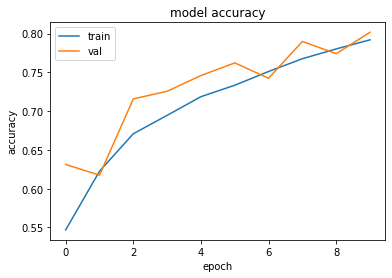

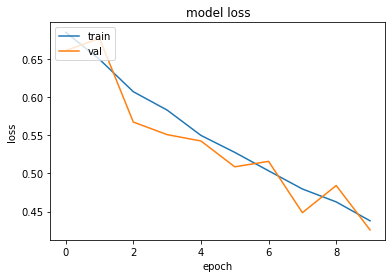

In [16]:
#ploting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#ploting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Save your model directly on the Drive 
##You can also save the model in different format like 
##Json
##pkl
## xml 


In [18]:
#save your model and download it or add drive path 
model.save('/content/Cats_dog.h5')

In [19]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
traning_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

cat


##**Regards Neb.tics**
